In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 使用 svm 支持向量机来做预测
fruits_df = pd.read_table('data/fruit_data_with_colors.txt')
X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()
y[y != 1] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
# 不同的C值
c_values = [0.1, 1, 1000]
for c_value in c_values:
    svm_model = SVC(C=c_value)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"c={c_value}, 准确率: {round(acc ,3)}")

c=0.1, 准确率: 0.733
c=1, 准确率: 0.6
c=1000, 准确率: 0.6


In [4]:
# 使用knn 算法来
fruits_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
fruits_name_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
# 分割数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
print(f"数据集样本数:{len(X)}, 训练集样本数量:{len(X_train)}, 测试集样本数:{len(X_test)}")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"准确率: {acc}")

数据集样本数:59, 训练集样本数量:44, 测试集样本数:15
[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]
准确率: 0.5333333333333333


### 数据挖掘基本流程
- 准备数据，read 数据到 pandas中
- 探索性数据分析(分析数据的相关性(正相关还是负相关))，特征的重要性
- 清洗数据以及做特征工程
- 建立多种基础模型，选择最优算法
- 提升精度
- 最终结果的可视化

In [6]:
# 准备数据
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('data/churn.csv')
col_names = churn_df.columns.tolist()
print(col_names)
to_show = col_names[:6] + col_names[-6:]
churn_df[to_show].head()

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [8]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 观察部分数据分布情况

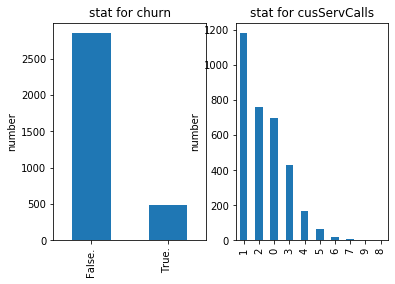

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.set(alpha=0.3)
plt.subplot2grid((1, 2), (0, 0))
churn_df['Churn?'].value_counts().plot(kind='bar')
plt.title("stat for churn")
plt.ylabel("number")

plt.subplot2grid((1, 2), (0, 1))
churn_df["CustServ Calls"].value_counts().plot(kind='bar')
plt.title("stat for cusServCalls")
plt.ylabel("number")
plt.show()

Text(0.5, 1.0, 'dis for day charge')

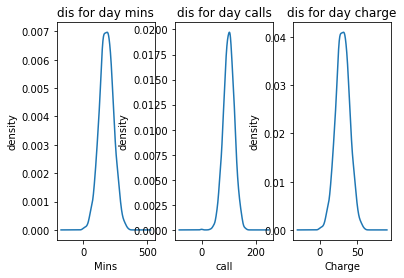

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)
plt.subplot2grid((1,3), (0, 0))
churn_df["Day Mins"].plot(kind="kde")
plt.xlabel("Mins")
plt.ylabel("density")
plt.title("dis for day mins")

plt.subplot2grid((1, 3), (0, 1))
churn_df["Day Calls"].plot(kind="kde")
plt.xlabel("call")
plt.ylabel("density")
plt.title("dis for day calls")

plt.subplot2grid((1, 3), (0, 2))
churn_df["Day Charge"].plot(kind='kde')
plt.xlabel("Charge")
plt.ylabel("density")
plt.title("dis for day charge")

### 观察特征和分类的关联

<Figure size 432x288 with 0 Axes>

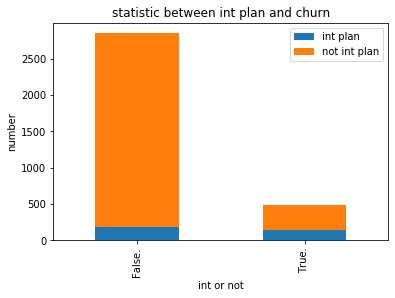

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)
# churn_df["Churn?"]
int_yes = churn_df["Churn?"][churn_df['Int\'l Plan'] == 'yes'].value_counts()
int_no = churn_df["Churn?"][churn_df['Int\'l Plan'] == 'no'].value_counts()
df_int = pd.DataFrame({'int plan': int_yes, "not int plan": int_no})
df_int.plot(kind='bar', stacked=True)
plt.title("statistic between int plan and churn")
plt.xlabel("int or not")
plt.ylabel("number")
plt.show()

<Figure size 432x288 with 0 Axes>

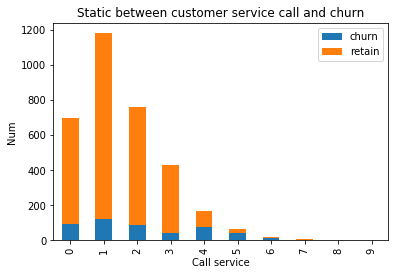

In [11]:
# 查看客户服务电话和结果的关联
fig = plt.figure()
fig.set(alpha='0.2')
cus_0 = churn_df["CustServ Calls"][churn_df["Churn?"] == 'False.'].value_counts()
cus_1 = churn_df["CustServ Calls"][churn_df["Churn?"] == 'True.'].value_counts()
df = pd.DataFrame({'churn':cus_1, 'retain':cus_0})
df.plot(kind='bar', stacked=True)
plt.title("Static between customer service call and churn")
plt.xlabel("Call service")
plt.ylabel("Num")
plt.show()

### 数据清洗与格式转化

In [12]:
ds_result = churn_df["Churn?"]
y = np.where(ds_result == "True.", 1, 0)
dummies_int = pd.get_dummies(churn_df['Int\'l Plan'], prefix='_int\'1 Plan')

dummies_voice = pd.get_dummies(churn_df["VMail Plan"], prefix='VMail')

ds_tmp = pd.concat([churn_df, dummies_int, dummies_voice], axis=1)

to_drop = [
    'State', 'Area Code', 'Phone', 'Churn?', 'Int\'l Plan', 'VMail Plan'
]
df = ds_tmp.drop(to_drop, axis=1)
df.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,_int'1 Plan_no,_int'1 Plan_yes,VMail_no,VMail_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


### 特征工程

In [13]:
X = df.as_matrix().astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("-"*60)
print("Unique targe labels:", np.unique(y))
print("-"*60)
print(len(y[y==0]))
print("-"*60)
print(len(y[y==1]))

Feature space holds 3333 observations and 19 features
------------------------------------------------------------
Unique targe labels: [0 1]
------------------------------------------------------------
2850
------------------------------------------------------------
483


/home/pawn/.pyenv/versions/3.7.1/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### 建立多种模型， 选择最优算法

In [14]:
# 交叉验证
from sklearn.model_selection import KFold
def run_cv(X, y, clf_class, **kwargs):
    kf = KFold(5, shuffle=True)
    y_pred = y.copy()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true, y_pred):
    return np.mean(y_true==y_pred)

print("Support vector machines:")
print(round(accuracy(y, run_cv(X, y, SVC)), 3))
print("LogisticRegression:")
print(round(accuracy(y, run_cv(X, y, LR)), 3))
print("K nearest neighbors")
print(round(accuracy(y, run_cv(X, y, KNN)), 3))

Support vector machines:
0.919
LogisticRegression:
0.864
K nearest neighbors
0.893


[0.91304348 0.89955022 0.89505247 0.89189189 0.88288288]
KNN: 0.8964841903372639, (0.009917108109011486)
------------------------------------------------------------
[0.85457271 0.88155922 0.86206897 0.83933934 0.86786787]
LR: 0.8610816213514865, (0.014010373009366328)
------------------------------------------------------------
[0.90554723 0.91604198 0.92803598 0.90840841 0.91591592]
SVM: 0.9147899023461242, (0.007803137224655218)
------------------------------------------------------------


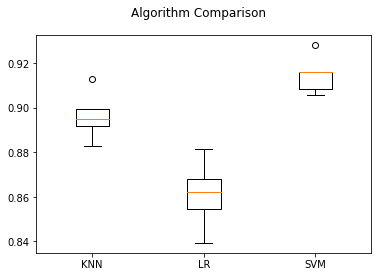

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 初始化模型
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression()))
models.append(("SVM", SVC()))

# 初始化
results = []
names = []
scoring = "accuracy" # 准确率
for name, model in models:
    kfold = KFold(5, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()}, ({cv_results.std()})")
    print("-"*60)

fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 提升精度

In [25]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features= 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
results.mean()

/home/pawn/.pyenv/versions/3.7.1/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9534975094855334

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
results.mean()

/home/pawn/.pyenv/versions/3.7.1/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9531972091852332

### 展示结果

In [43]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(5, True)
    y_prod = np.zeros((len(y), 2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_prod[test_index] = clf.predict_proba(X_test)
    return y_prod

In [46]:
RF = RandomForestClassifier
pred_prod = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prod[:, 1]
is_churn = y == 1
counts = pd.value_counts(pred_churn)
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)
counts = pd.concat([counts, true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prod']
counts

,pred_prob,count,true_prod
0,0.0,1784,0.026345
1,0.1,694,0.028818
2,0.2,265,0.064151
3,0.3,130,0.161538
4,0.9,84,0.988095
5,0.8,77,0.935065
6,1.0,75,1.000000
7,0.4,66,0.469697
8,0.6,56,0.803571
9,0.7,54,0.833333
